# Chapter 3. Sampling the Imaginary

In [1]:
import pandas as pd
import seaborn as sns
import torch

import pyro
import pyro.distributions as dist
import pyro.ops.stats as stats

import rethinking

In [2]:
sns.set(font_scale=1.25, rc={"figure.figsize": (8, 6)})

pyro.enable_validation()
pyro.set_rng_seed(1)

### Code 3.1

In [3]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
PrVP

0.08683729433272395

### Code 3.2

In [4]:
p_grid = torch.linspace(start=0, end=1, steps=1000)
prior = torch.tensor(1.).repeat(1000)
likelihood = dist.Binomial(total_count=9, probs=p_grid).log_prob(torch.tensor(6.)).exp()
posterior = likelihood * prior
posterior = posterior / sum(posterior)

### Code 3.3

In [5]:
samples = dist.Empirical(p_grid, posterior.log()).sample(torch.Size([int(1e4)]))

### Code 3.4

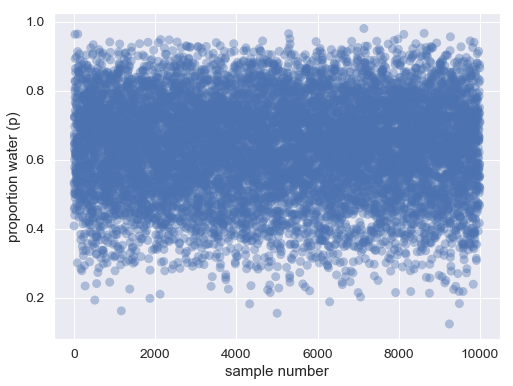

In [6]:
ax = sns.scatterplot(range(len(samples)), samples, s=80, alpha=0.4, edgecolor="none")
ax.set(xlabel="sample number", ylabel="proportion water (p)");

### Code 3.5

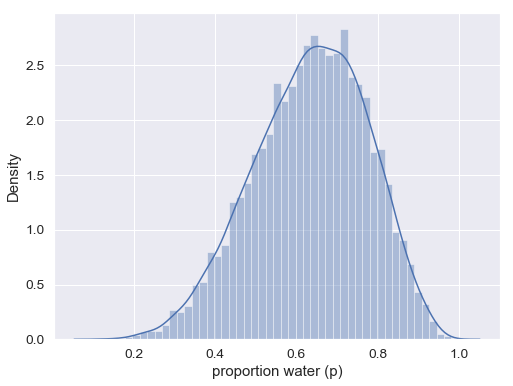

In [7]:
ax = sns.distplot(samples)
ax.set(xlabel="proportion water (p)", ylabel="Density");

### Code 3.6

In [8]:
# add up posterior probability where p < 0.5
(posterior[p_grid < 0.5]).sum()

tensor(0.1719)

### Code 3.7

In [9]:
(samples < 0.5).sum().float() / 1e4

tensor(0.1770)

### Code 3.8

In [10]:
((samples > 0.5) & (samples < 0.75)).sum().float() / 1e4

tensor(0.6021)

### Code 3.9

In [11]:
stats.quantile(samples, 0.8)

tensor(0.7598)

### Code 3.10

In [12]:
stats.quantile(samples, [0.1, 0.9])

tensor([0.4454, 0.8118])

### Code 3.11

In [13]:
p_grid = torch.linspace(start=0, end=1, steps=1000)
prior = torch.tensor(1.).repeat(1000)
likelihood = dist.Binomial(total_count=3, probs=p_grid).log_prob(torch.tensor(3.)).exp()
posterior = likelihood * prior
posterior = posterior / posterior.sum()
samples = dist.Empirical(p_grid, posterior.log()).sample(torch.Size([int(1e4)]))

### Code 3.12

In [14]:
stats.pi(samples, prob=0.5)

tensor([0.7107, 0.9319])

### Code 3.13

In [15]:
stats.hpdi(samples, prob=0.5)

tensor([0.8438, 1.0000])

### Code 3.14

In [16]:
p_grid[posterior.argmax()]

tensor(1.)

### Code 3.15

In [17]:
adj = 0.01
silverman_factor = (0.75 * samples.size(0)) ** (-0.2)
bandwidth = adj * silverman_factor * samples.std()
x = torch.linspace(samples.min(), samples.max(), 1000)
y = dist.Normal(samples, bandwidth).log_prob(x.unsqueeze(-1)).logsumexp(-1).exp()
x[y.argmax()]

tensor(0.9629)

### Code 3.16

In [18]:
print(samples.mean())
print(samples.median())

tensor(0.8023)
tensor(0.8438)


### Code 3.17

In [19]:
(posterior * (0.5 - p_grid).abs()).sum()

tensor(0.3129)

### Code 3.18

In [20]:
loss = (posterior * (p_grid.unsqueeze(1) - p_grid).abs()).sum(1)

### Code 3.19

In [21]:
p_grid[loss.argmin()]

tensor(0.8408)

### Code 3.20

In [22]:
dist.Binomial(total_count=2, probs=0.7).log_prob(torch.arange(3.)).exp()

tensor([0.0900, 0.4200, 0.4900])

### Code 3.21

In [23]:
dist.Binomial(total_count=2, probs=0.7).sample().long()

tensor(2)

### Code 3.22

In [24]:
dist.Binomial(total_count=2, probs=0.7).sample(torch.Size([10])).long()

tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 1])

### Code 3.23

In [25]:
dummy_w = dist.Binomial(total_count=2, probs=0.7).sample(torch.Size([int(1e5)]))
dummy_w.long().bincount().float() / 1e5

tensor([0.0888, 0.4199, 0.4913])

### Code 3.24

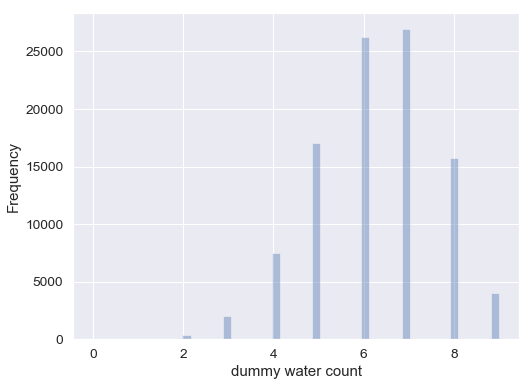

In [26]:
dummy_w = dist.Binomial(total_count=9, probs=0.7).sample(torch.Size([int(1e5)]))
ax = sns.distplot(dummy_w, kde=False)
ax.set(xlabel="dummy water count", ylabel="Frequency");

### Code 3.25

In [27]:
w = dist.Binomial(total_count=9, probs=0.7).sample(torch.Size([int(1e4)]))

### Code 3.26

In [28]:
w = dist.Binomial(total_count=9, probs=samples).sample()

### Code 3.27

In [29]:
p_grid = torch.linspace(start=0, end=1, steps=1000)
prior = torch.tensor(1.).repeat(1000)
likelihood = dist.Binomial(total_count=3, probs=p_grid).log_prob(torch.tensor(3.)).exp()
posterior = likelihood * prior
posterior = posterior / posterior.sum()
torch.manual_seed(100)
samples = dist.Empirical(p_grid, posterior.log()).sample(torch.Size([int(1e4)]))

### Code 3.28

In [30]:
birth1 = [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
          0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
          0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
birth2 = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
          0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

### Code 3.29

In [31]:
homeworkch3 = pd.read_csv("../data/homeworkch3.csv")

### Code 3.30

In [32]:
sum(birth1) + sum(birth2)

111